## Problem Sheet 3

## 1.  Glycolysis
Glycolysis is the process by which cells break down sugars to harvest their chemical energy.  The simplest model of glycolysis involves two chemical species, Adenosine Diphosphate (ADP) and phosphorylated fructose (F6P).  ADP plays an important role in the transport of energy in the cell, while F6P is the molecule to which the sugar is converted.  

In the model, we assume a constant inflow of F6P, denoted as $Y$, into the system at rate $\beta$ such that 

\begin{align*}
\varnothing \xrightarrow{\beta} Y
\end{align*}	

The F6P can be converted directly into ADP, denoted at $X$, at a rate $\alpha$.

\begin{align*}
Y \xrightarrow{\alpha} X
\end{align*}	

Additionally, F6P can combine with ADP such that

\begin{align*}
2X + Y \xrightarrow{\gamma} 3X
\end{align*}

Finally, we assume that ADP degrades at rate $\mu$

\begin{align*}
X \xrightarrow{\mu} \varnothing
\end{align*}


1. Apply the law of mass action to obtain the system of ODEs that describe the dynamics of concentrations $x = [X]$ and $y = [Y]$.

2. Introduce suitable nondimensional variables, $u$, $v$, and $\tau$ such that the system of equations becomes
\begin{align*}
\frac{du}{d\tau} = - u + a v + vu^2,\\  
\frac{dv}{d\tau} = b - av  - vu^2.
\end{align*}
Find the expressions for $a$ and $b$ in terms of the parameters in the original equations.

3. Find and sketch the nullclines.
4. Find the fixed point.
5. Show that following lines can be used to construct the outer boundary of a trapping set: 
(i) A vertical line connecting $(0,0)$ and $(0, b/a)$. (ii) A horizontal line connecting $(0, b/a)$ and $(b,b/a)$.
(iii) A diagonal line of slope $-1$ from the point $(b,b/a)$ to the point where it intersects the $u$-nullcline.  Call the point where they intesect $(u_0, v_0)$. (iv) A vertical line from $(u_0, v_0)$ to $(u_0, 0)$. (v)A horizontal line from $(u_0, 0)$ to $(0, 0)$. 

6. For what values of the parameters $a$ and $b$ does a close cycle exist in the trapping set? *Hint: Consider the stability of the fixed point.*



## 2. Limit cycles in a predator-prey system
Consider the generalized predator-prey model
\begin{align*}
\frac{dN}{dt} = N\left(r\left(1 - \frac{N}{K}\right)-k\frac{P}{N+D}\right), \\
\frac{dP}{dt} = sP\left(1 - h\frac{P}{N}\right),
\end{align*}
where $r$, $K$, $k$, $D$, $s$ and $h$ are positive constants.
We can nondimensionalise the system by introducing
\begin{align}
N = Ku, P = Kv/h, t = \tau/r
\end{align}
such that the system becomes
\begin{align*}
\frac{du}{d\tau} = u(1 - u) - \frac{auv}{u + d} = f_1(u,v) \\
\frac{dv}{d\tau} = b v \left(1 - \frac{v}{u}\right) = f_2(u,v)
\end{align*}
where $a = k/(hr)$, $b = s/r$, and $d = D/K$.

## Fixed points

1. Determine the fixed points and their stability. In particular, show that there exists a symmetric fixed point
$$u^*=v^*= \frac{(1-a-d) + \sqrt{(1-a-d)^2 + 4d}}{2}.$$
whose Jacobuian can be written as
\begin{align*}
J(u^*,u^*) = \left[\begin{array}{cc}
u^*\left(\frac{au^*}{(u^* + d)^2} - 1 \right) & -\frac{au^*}{u^* + d} \\
b & -b
\end{array}\right]
\end{align*}
Use the fact that $u^*(1-u^*) = au^*v^*/(u^* + d)$.

2. Recall that the fixed point $(u^*,u^*)$ will be unstable provided that $\textrm{trace}(J) > 0$ and $\textrm{det}(J) > 0$. Use this to show that the fixed point is usnstable if and only if
\begin{align}
b< u^*\left(\frac{au^*}{(u* + d)^2} - 1 \right)\equiv h(a,d)
\end{align}
Note that $u^*=u^*(a,d)$. Use the code below to establish there exists a paramter regime for which the fixed point is unstable.

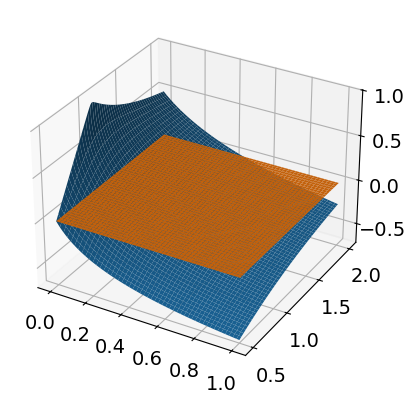

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#standard parameter values a = 1, b = 1, d = 0.1

a = np.linspace(0.5,2,200)
d = np.linspace(0.0001,1.0,200)
dmat,amat = np.meshgrid(d,a)
onemamd = 1 - amat - dmat
ustar = 0.5*(onemamd + (onemamd**2 + 4*dmat)**0.5)
bmat = ustar*(amat*ustar/((ustar + dmat)**2) - 1)
b2 = 0*amat;
ax.plot_surface(dmat,amat,bmat,vmin = 0);
ax.plot_surface(dmat,amat,b2);

3. Show that a limit cycle emerges through a Hopf bifurcation where $b$ is the bifurcation parameter. Compute the period of the limit cycle just after the bifurcation has occured. You may leave your expression in terms of $u^*$. Use the Python cell below to solve the system numerically and show how below the blue surface in parameter space the trajectories in phase space approaching the limit cycle.  The second figure plots $u$ and $v$ as a function of time.  

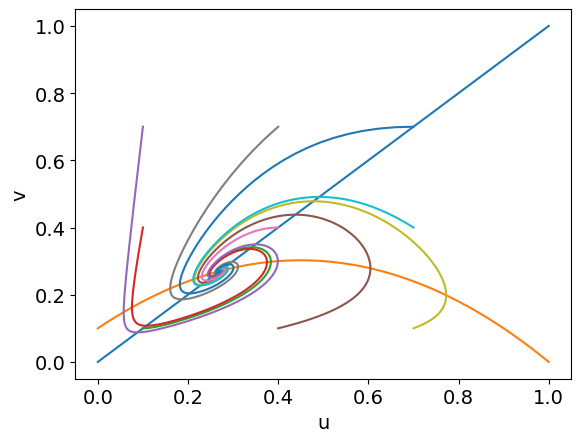

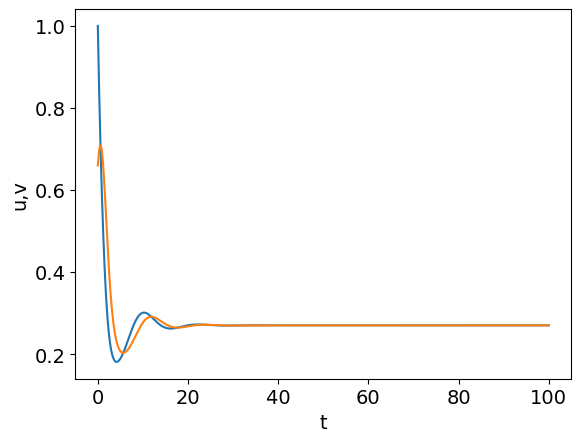

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.integrate import odeint


a = 1
b = 0.7
d = 0.1
h = 0.0;

u = np.linspace(0,1,1000)
v1 = u
v2 = (1 - u)*(u + d)/a
plt.figure(0)
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("u")
plt.ylabel("v")
plt.plot(u,v1)
plt.plot(u,v2)

def du_dt(u, t):
    return [u[0]*(1 - u[0]) - a*u[0]*u[1]/(u[0] + d) - h, b*u[1]*(1 - u[1]/u[0])]

ts = np.linspace(0, 100, 1000)
ics = np.arange(0.1, 0.9, 0.3)
for i in ics:
    for j in ics:
        u0 = [i, j]
        us = odeint(du_dt, u0, ts)
        pop1 = us[:,0]
        pop2 = us[:,1]
        plt.figure(0)
        plt.plot(pop1,pop2);
        
plt.xlabel("u");
plt.ylabel("v");

u0 = [1.0, 0.66]
us = odeint(du_dt, u0, ts)
pop1 = us[:,0]
pop2 = us[:,1]
plt.figure(1)
plt.plot(ts,pop1)
plt.plot(ts,pop2);
plt.xlabel("t");
plt.ylabel("u,v");

### Nullclines and construction of a trapping set
The nullclines are given by the curves
\begin{align}
0 = u(1 - u) - \frac{auv}{u + d} \\
0 = b v \left(1 - \frac{v}{u}\right)
\end{align}
The nullclines can be plotted using the python cell below for different values of $a$, $b$ and $d$. Using the nullclines, we can determine the regions where $f_1 > 0$ or $f_1 < 0$, and $f_2 > 0$ or $f_2 < 0$ and subsequently use this information to construct the outer region of a trapping set, ${
\mathcal R}$.  

1. Show that $f_1(1,v) <0$, $f_2(u,1) \leq0$, $f_1(u,0)>0, f_2(u,0)=0$ for $0<u<1$. This establishes the lines $u=0,1$ and $v=1$ as subsets of an outer trapping curve. (Finding the sloped line is more involved.)
2. Assuming that $(u^*,u^*)$ is unstable show that an inner curve can be found that generates a trapping set ${\mathcal R

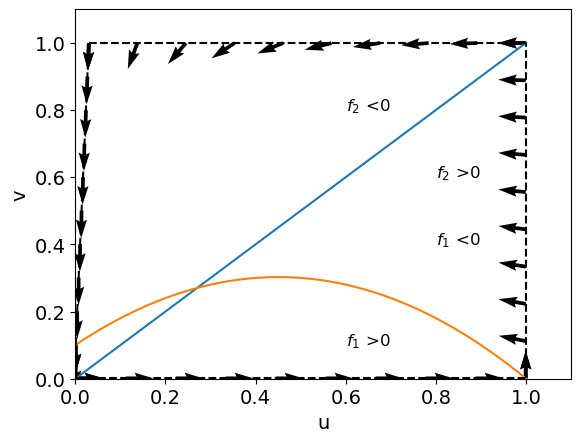

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

#Set the parameter values
a = 1.0;
b = 0.2;
d = 0.1;

#Compute and plot the nullclines
u = np.linspace(0,1,1000)
v1 = u
v2 = (1 - u)*(u + d)/a

plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("u")
plt.ylabel("v")
plt.plot(u,v1)
plt.plot(u,v2)
plt.ylim(0,1.1)
plt.xlim(0,1.1);
plt.text(0.6, 0.8, "$f_2$ <0", fontsize=12);
plt.text(0.8, 0.6, "$f_2$ >0", fontsize=12);
plt.text(0.8, 0.4, "$f_1$ <0", fontsize=12);
plt.text(0.6, 0.1, "$f_1$ >0", fontsize=12);

#Set the corners of the trapping set.
ub = 0.999
vb = ub
ua = ub
va = (1 - ua)*(ua + d)/a
ue = va;
ve = va;
ud = ue;
vd = (1 - ud)*(ud + d)/a
vc = vb
uc = 0.03

#Set the right-most boundary of the trapping set
u = np.linspace(ua,ub,10)
v = np.linspace(va,vb,10)
f1 = u*(1-u) - a*u*v/(u+d)
f2 = b*v*(1 - v/u)
norm = (f1**2 + f2**2)**0.5
plt.plot(u,v,'k--')
plt.quiver(u,v,f1/norm,f2/norm)

#Set the lower boundary of the trapping set
u = np.linspace(ue,ua,10)
v = np.linspace(ve,va,10)
f1 = u*(1-u) - a*u*v/(u+d)
f2 = b*v*(1 - v/u)
norm = (f1**2 + f2**2)**0.5
plt.plot(u,v,'k--')
plt.quiver(u,v,f1/norm,f2/norm)

#Set part of the left boundary
u = np.linspace(ue,ud,3)
v = np.linspace(ve,vd,3)
f1 = u*(1-u) - a*u*v/(u+d)
f2 = b*v*(1 - v/u)
norm = (f1**2 + f2**2)**0.5
plt.plot(u,v,'k--')
plt.quiver(u,v,f1/norm,f2/norm)

#Set the upper boundary
u = np.linspace(uc,ub,10)
v = np.linspace(vc,vb,10)
f1 = u*(1-u) - a*u*v/(u+d)
f2 = b*v*(1 - v/u)
norm = (f1**2 + f2**2)**0.5
plt.plot(u,v,'k--')
plt.quiver(u,v,f1/norm,f2/norm)

#Find and plot the diagonal line
u = np.linspace(ud,uc,10)
m = (vc - vd)/(uc - ud)
k = vd - m*ud
v = m*u + k
f1 = u*(1-u) - a*u*v/(u+d)
f2 = b*v*(1 - v/u)
norm = (f1**2 + f2**2)**0.5
plt.plot(u,v,'k--')
plt.quiver(u,v,f1/norm,f2/norm);

Using the nullclines, we determine the regions where $f_1 > 0$ or $f_1 < 0$, and $f_2 > 0$ or $f_2 < 0$ and subsequently use this information to construct the outer region of the trapping set, $R$.  

Let's take, for example, the line $u = 1$ as a possible right most boundary of the trapping set.  Along this line, we know that the outward pointing normal will be $\mathbf{\hat u}$, the unit vector pointing to the right.  Thus, when considering $\mathbf{n}\cdot\mathbf{f} < 0$ is satisfied, for this boundary, we'll have to check if $\mathbf{\hat{u}}\cdot\mathbf{f}(1,v) = f_1(1,v) < 0$.  Since,

\begin{align}
f_1(1,v) = -\frac{av}{d + 1},
\end{align}

$a >0$, and $d > 0$, we have $f_1(1,v) < 0$ for $v >0$ and the condition for the trapping set is satisfied (at least for this part of the boundary!).  Notice that as long as the boundary that we are constructing is in the region $f_1 < 0$, we could have taken any line $u = k$, where $k$ is a constant.  In the Python cell above, we take $u = 0.999$

Similarly, we can take the line $v = 1$.  Here, $\mathbf{n} = \mathbf{\hat{v}}$, and we are therefore interested in determining if $f_2 < 0$ along this line.  For $v = 1$, we have 

\begin{align}
f_2(u,1) = b(1 - 1/u).  
\end{align}

Since, $b > 0$ and provided that $u<1$, we'll have $f_2 <0$ along this line. Note, that these line cut the nullclines in such a way that flow will be along the boundary, but this is admissible since $R$ is closed.  Again, provided we are in the region $f_2 < 0$, we can take any line $v = k$, where $k$ is a constant.

These and the three additional sections of the outer boundary of $R$ are plotted using the Python cell above.  The arrows along the lines indicate the direction of the vector $\mathbf{f}$ at the point where it is drawn.  Two of the addition sections are constructed in a very similar way using vertical or horizontal lines.  The final section requires a diagonal line as $f_1 < 0$ in this region of phase space.  This means a vertical line at this part of left boundary would not necessarily yield a trapping set.  Note that finding this diagonal line is a nontrivial task!   

## Relaxation oscillations.
Suppose that $b = \epsilon \ll 1$ such that the equations take the form

\begin{align*}
\frac{du}{d\tau} = f_1(u,v) \\
\frac{dv}{d\tau} = \epsilon f_2(u,v), 
\end{align*}

where $f_1 = u(1 - u) - auv/(u + d)$ and $f_2 = v(1 - v/u)$.  The code and figures below show that this system exhibits relaxation oscillator-like dynamics, though slightly different from those we saw with the Fitzhugh-Nagumo system.  


1. For part of the orbit, the trajectory lies essentially on the nullcline given by $f_1(u,v) = 0$. Explain why this is the case.  
2. When the trajectory reaches the local maximum, $(u_2, v_2)$, it leaves the nullcline and moves rapidly at a nearly constant value of $v$ toward the $v$-axis.  Explain why this has occured using arguments based on the a one-dimensional system where $du/dt = f_1(u;v)$ and $v$ being considered a parameter.  
3. Near the $v$-axis, the trajectory abruptly changes direction and moves downwards. Explain why this occurs when $u \approx \epsilon v_2^2$.  
4. Rescaling such that $u = \epsilon U$, show that in the limit $\epsilon \ll 1$,
\begin{align*}
\frac{dU}{d\tau} = U - \frac{avU}{d} \\
\frac{dv}{d\tau} = -\frac{v^2}{U}, 
\end{align*}
and conclude that this portion of the orbit also evolves at the fast timescale.

5. As a result, conclude that the approximate period of the orbit,
\begin{align*}
T =\frac{1}{a\epsilon}\int_{u_1}^{u_2}\frac{u(1 - d - 2u)}{v(u)(u - v(u))}du,
\end{align*}
where $v(u) = (1 - u)(u + d)/a$.

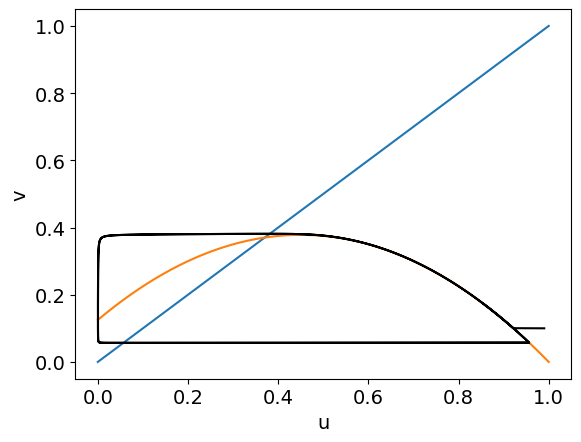

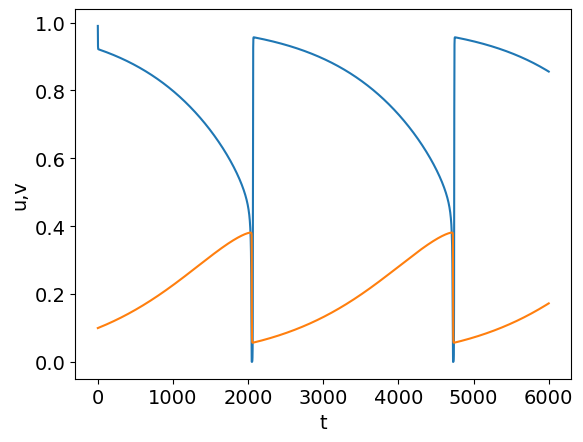

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.integrate import odeint

a = 0.8
b = 0.001
d = 0.1

u = np.linspace(0,1,100000)
v1 = u
v2 = (1 - u)*(u + d)/a
plt.figure(0)
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("u")
plt.ylabel("v")
plt.plot(u,v1)
plt.plot(u,v2)

def du_dt(u, t):
    return [u[0]*(1 - u[0]) - a*u[0]*u[1]/(u[0] + d), b*u[1]*(1 - u[1]/u[0])]

u0 = [0.99, 0.1]
ts = np.linspace(0, 6000, 1000000)
us = odeint(du_dt, u0, ts)
pop1 = us[:,0]
pop2 = us[:,1]
plt.figure(0)
plt.plot(pop1,pop2,'k-')

plt.figure(1)
plt.plot(ts,pop1)
plt.plot(ts,pop2);
plt.xlabel("t");
plt.ylabel("u,v");


## 3. The Brusselator

The 'Brusselator' reaction mechanism,

\begin{align*}
A &\xrightarrow{k_1} X, \\
B + X &\xrightarrow{k_2} Y + D, \\
2X + Y &\xrightarrow{k_3} 3X, \\
X &\xrightarrow{k_4} E
\end{align*}

is a model for a class of autocatalytic reactions that exhibit oscillations.  

1. Assuming that the concentrations of $A$ and $B$ are kept constant, use the law of mass action to find they system of ODEs that governs the dynamics of the concentrations of $X$ and $Y$.
2. Nondimensionalise the system to obtain,

\begin{align*}
\frac{du}{d\tau} = 1 - (\beta + 1)u + \alpha u^2v,\\  
\frac{dv}{d\tau} = \beta u - \alpha u^2v.
\end{align*}

What are $\alpha$ and $\beta$ in terms of the original parameters in the reaction?

3. Determine the fixed point and show that a bifurcation occurs at $\beta_c = 1 + \alpha$, as the fixed point goes from a stable to an unstable spiral. 
4. Show that the outer boundary of the trapping set can be constructed of two horizontal lines, two vertical lines and one diagonal line with slope $-1$, and therefore, conclude that a limit cycle emerges. 
5. Compute the period of the limit cycle that emerges just after the bifurcation?
6. *A challenge for those of you that are very keen:* Use the Stuart-Landau solution to obtain an expression for the limit cycle just after the bifurcation.  This is done in the notes for the Fitzhugh-Nagumo model.  Modify the Python cell in the notes to evaluate your expression and compare the resulting limit cycle with that shown in the Python cell below.

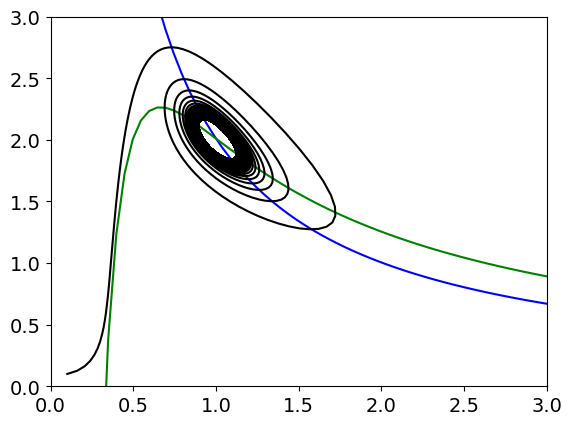

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.integrate import odeint

a = 1.0
b = 1.0 + a*(1 + 0.01)

plt.figure(0)

u = np.linspace(0.1, 5, 100)
v1 = b/(a*u);
v2 = ((1 + b)*u - 1)/(a*u**2)
plt.plot(u,v1,'b-');
plt.plot(u,v2,'g-');

def du_dt(u, t):
    return [1 - (b + 1)*u[0] + a*u[0]**2*u[1], b*u[0] - a*u[0]**2*u[1]]

ts = np.linspace(0, 10000, 100000)
u0 = [0.1, 0.1]
us = odeint(du_dt, u0, ts)
pop1 = us[:,0]
pop2 = us[:,1]
plt.plot(pop1,pop2,'k-');
plt.xlim(0, 3)
plt.ylim(0,3);
